In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [182]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [183]:
grades_22_all = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA_ANALYSIS/2022 grades dataset.csv")
grades_23_all = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA_ANALYSIS/2023 grades dataset.csv")

mean_grades_nationwide_2022 = 63.135942686136694
mean_grades_nationwide_2023 = 65.47512372896757

# Calculate the variance for each year
variance_2022 = ((grades_22_all['Percentage'] - mean_grades_nationwide_2022) ** 2).mean()
variance_2023 = ((grades_23_all['percentage'] - mean_grades_nationwide_2023) ** 2).mean()

# Calculate the standard deviation for each year
std_2022 = np.sqrt(variance_2022)
std_2023 = np.sqrt(variance_2023)

print("2022 Avg:" , mean_grades_nationwide_2022)
print("2022 Std:" , std_2022)
print("2023 Avg:" , mean_grades_nationwide_2023)
print("2023 Std:" , std_2023)


2022 Avg: 63.135942686136694
2022 Std: 14.879635552478932
2023 Avg: 65.47512372896757
2023 Std: 13.631335819905251


Read and Merge Datasets

In [184]:
grades_df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/DATA_ANALYSIS/Cleaned Data/Copy of Grades_by_Governorate.csv")
gdp_df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/DATA_ANALYSIS/Cleaned Data/GDP_by_Governorate.csv")
health_df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/DATA_ANALYSIS/Cleaned Data/Health_by_Governorate.csv")
education_df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/DATA_ANALYSIS/Cleaned Data/education.csv")
wages_df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/DATA_ANALYSIS/Cleaned Data/Wages_by_Governorate.csv")

merged_df = pd.merge(gdp_df, grades_df, on='Governorate', how='inner')
merged_df = pd.merge(merged_df, health_df, on='Governorate', how='inner')
merged_df = pd.merge(merged_df, education_df, on='Governorate', how='inner')
merged_df = pd.merge(merged_df, wages_df, on='Governorate', how='inner')

In [185]:
print(merged_df.columns)
print(merged_df.shape)

Index(['Governorate', 'Agriculture', 'Crude Petroleum Extraction',
       'Other extractions', 'Petroleum Refinement', 'Manufacturing Industries',
       'Electricity and Gas', 'Water', 'Sewerage', 'Waste Recycling',
       'Construction', 'Whole sale and Retail Trade', 'Communication',
       'Information', 'Transportation and Storage',
       'Accommodation and Food Service Activities', 'Real Estate Ownership',
       'Business Services', 'Education', 'Health', 'Other Services',
       'Non Financial Corporations', 'Financial Corporations',
       'General Government',
       'Non Profit Institutions Serving House hold Sector', 'DomesticWorkers',
       'Total Governorate GDP', 'Literature_2022', 'Math_2022', 'Science_2022',
       'total_mean_2022', 'Literature_2023', 'Math_2023', 'Science_2023',
       'total_mean_2023', 'Population', 'Hospitals_numbers', 'Beds_numbers',
       'Intensive_Care_Beds_numbers', 'Incubators_numbers',
       'Dialysis_Devices_numbers', 'Respirators_numb

## High School Grades Analysis

In [186]:
merged_df['Literature_avg'] = merged_df[['Literature_2022', 'Literature_2023']].mean(axis=1)
merged_df['Math_avg'] = merged_df[['Math_2022', 'Math_2023']].mean(axis=1)
merged_df['Science_avg'] = merged_df[['Science_2022', 'Science_2023']].mean(axis=1)
merged_df['total_mean_avg'] = merged_df[['total_mean_2022', 'total_mean_2023']].mean(axis=1)

Sort Data by 2023 Average *Grades*

In [187]:
merged_df.sort_values(by=['total_mean_2023'],ascending=False, inplace=True)

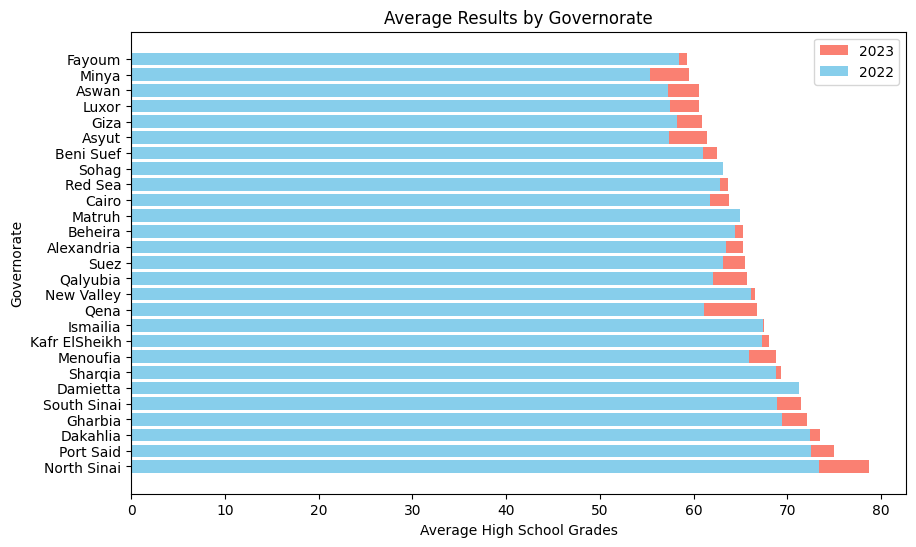

In [188]:
plt.figure(figsize=(10, 6))
plt.barh(merged_df['Governorate'], merged_df['total_mean_2023'], color='salmon', label="2023")
plt.barh(merged_df['Governorate'], merged_df['total_mean_2022'], color='skyblue',label="2022")
plt.xlabel('Average High School Grades')
plt.ylabel('Governorate')
plt.title('Average Results by Governorate')
plt.legend()
plt.show()

### Average Total Grades by Governorate in 2022 and 2023

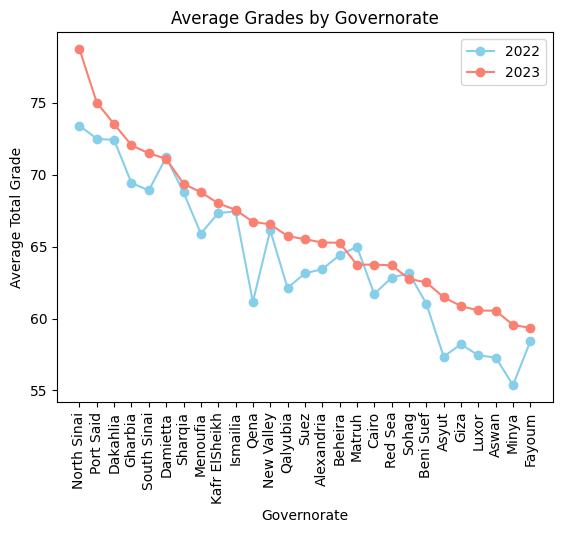

In [189]:
merged_df = merged_df.sort_values(by="total_mean_2023",ascending=False)
plt.plot(merged_df['Governorate'], merged_df['total_mean_2022'], marker='o', linestyle='-', color='skyblue',label="2022")
plt.plot(merged_df['Governorate'], merged_df['total_mean_2023'], marker='o', linestyle='-', color='salmon',label="2023")

plt.title('Average Grades by Governorate')
plt.xlabel('Governorate')
plt.ylabel('Average Total Grade')
plt.xticks(rotation=90)
plt.legend()
print()

### Average Grades by Section from 2022 to 2023

Math Section

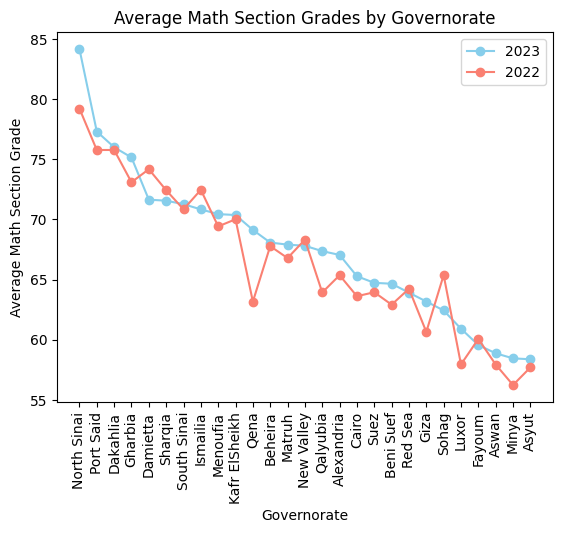

In [190]:
merged_df.sort_values(by="Math_2023",inplace=True,ascending = False)
plt.plot(merged_df['Governorate'], merged_df['Math_2023'], marker='o', linestyle='-', color='skyblue',label="2023")
plt.plot(merged_df['Governorate'], merged_df['Math_2022'], marker='o', linestyle='-', color='salmon',label="2022")

plt.title('Average Math Section Grades by Governorate')
plt.xlabel('Governorate')
plt.ylabel('Average Math Section Grade')
plt.xticks(rotation=90)
plt.legend()

print()

Science Section

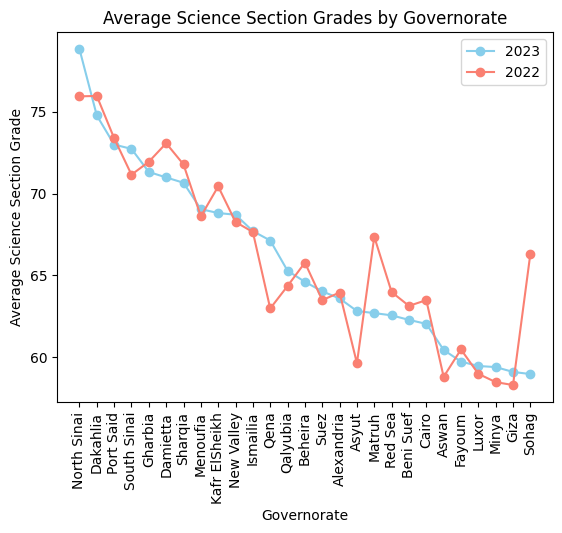

In [191]:
merged_df.sort_values(by="Science_2023",inplace=True,ascending = False)
plt.plot(merged_df['Governorate'], merged_df['Science_2023'], marker='o', linestyle='-', color='skyblue',label="2023")
plt.plot(merged_df['Governorate'], merged_df['Science_2022'], marker='o', linestyle='-', color='salmon',label="2022")

plt.title('Average Science Section Grades by Governorate')
plt.xlabel('Governorate')
plt.ylabel('Average Science Section Grade')
plt.xticks(rotation=90)
plt.legend()
print()

Literature Section

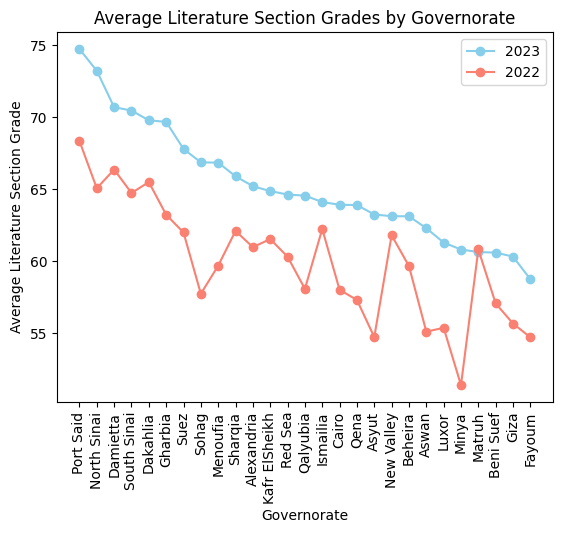

In [192]:
merged_df.sort_values(by="Literature_2023",inplace=True,ascending = False)

plt.plot(merged_df['Governorate'], merged_df['Literature_2023'], marker='o', linestyle='-', color='skyblue',label="2023")
plt.plot(merged_df['Governorate'], merged_df['Literature_2022'], marker='o', linestyle='-', color='salmon',label="2022")

plt.title('Average Literature Section Grades by Governorate')
plt.xlabel('Governorate')
plt.ylabel('Average Literature Section Grade')
plt.xticks(rotation=90)

plt.legend()
print()

### Difference From mean grades

In [193]:
# Calculate the Z-scores for 2022 grades
merged_df['zscore_2022'] = (merged_df['total_mean_2022'] - mean_grades_nationwide_2022) / std_2022

# Calculate the Z-scores for 2023
merged_df['zscore_2023'] = (merged_df['total_mean_2023'] - mean_grades_nationwide_2023) / std_2023


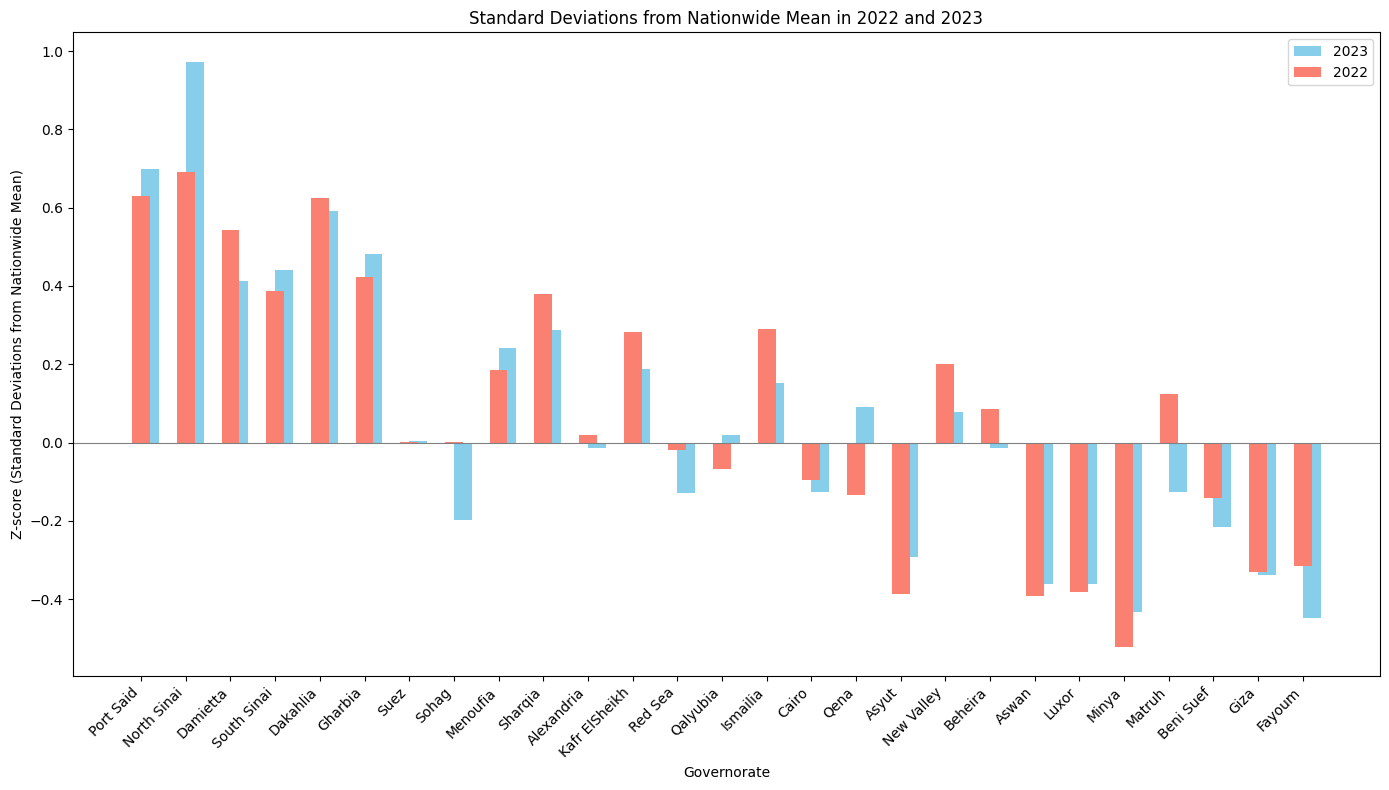

In [194]:

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the Z-scores for 2023 (offset by 0.4 to avoid overlap)
ax.bar(merged_df['Governorate'], merged_df['zscore_2023'],color = "skyblue", width=0.4, label='2023', align='edge')

# Plot the Z-scores for 2022
ax.bar(merged_df['Governorate'], merged_df['zscore_2022'],color = "salmon", width=0.4, label='2022', align='center')


# Add a horizontal line at y=0 to indicate the nationwide mean
ax.axhline(0, color='gray', linewidth=0.8)

# Add labels and title
ax.set_xlabel('Governorate')
ax.set_ylabel('Z-score (Standard Deviations from Nationwide Mean)')
ax.set_title('Standard Deviations from Nationwide Mean in 2022 and 2023')
ax.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

Z-Score by governorates over the two years

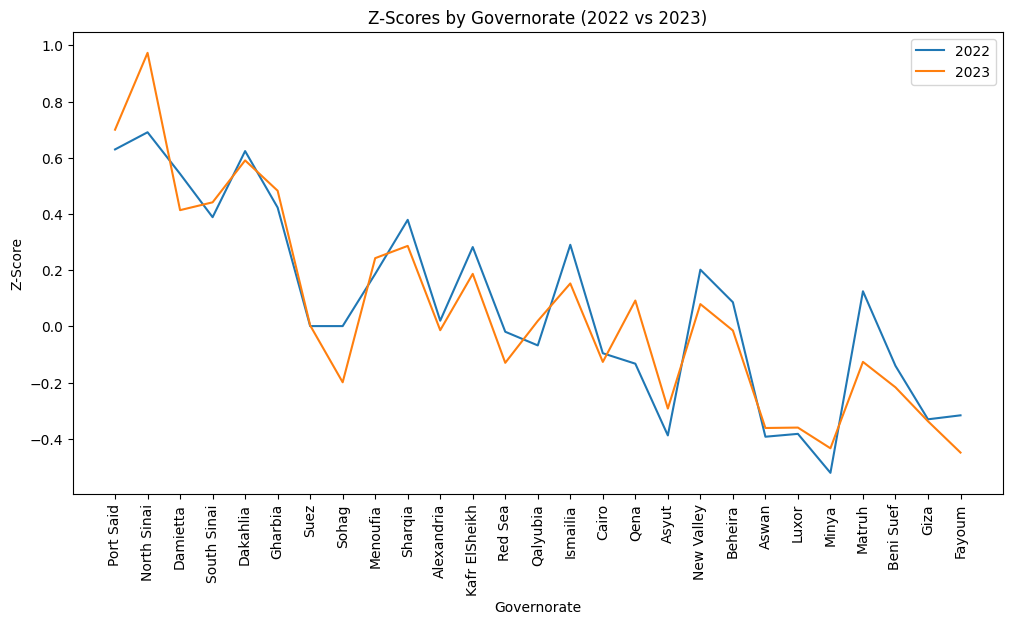

In [195]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='Governorate', y='zscore_2022', label='2022')
sns.lineplot(data=merged_df, x='Governorate', y='zscore_2023', label='2023')
plt.xticks(rotation=90)
plt.title('Z-Scores by Governorate (2022 vs 2023)')
plt.xlabel('Governorate')
plt.ylabel('Z-Score')
plt.legend()
plt.show()

Correlation between 2022 Z-Scores and 2023 Z-Scores

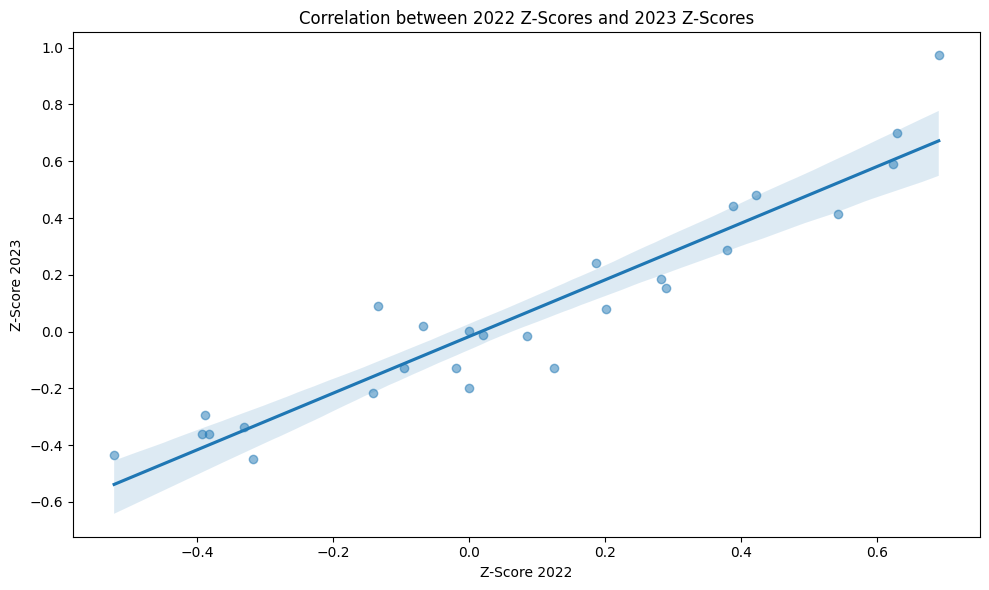

In [235]:
plt.figure(figsize=(10, 6))
sns.regplot(x='zscore_2022', y='zscore_2023', data=merged_df, scatter_kws={'alpha':0.5})

# Add titles and labels
plt.title('Correlation between 2022 Z-Scores and 2023 Z-Scores')
plt.xlabel('Z-Score 2022')
plt.ylabel('Z-Score 2023')

# Display the plot
plt.tight_layout()
plt.show()


Z-Scores distribution

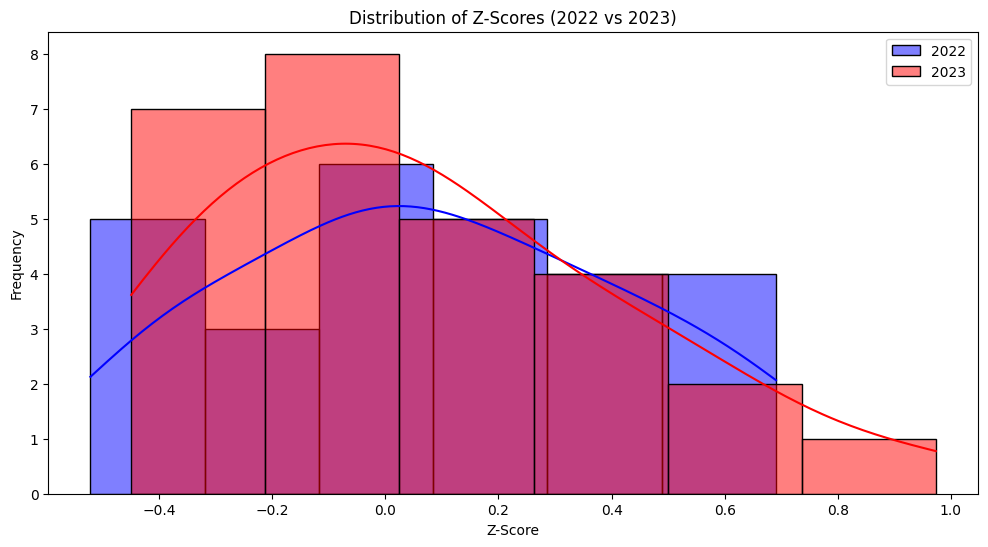

In [196]:
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['zscore_2022'], kde=True, color='blue', label='2022')
sns.histplot(merged_df['zscore_2023'], kde=True, color='red', label='2023')
plt.title('Distribution of Z-Scores (2022 vs 2023)')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Distribution

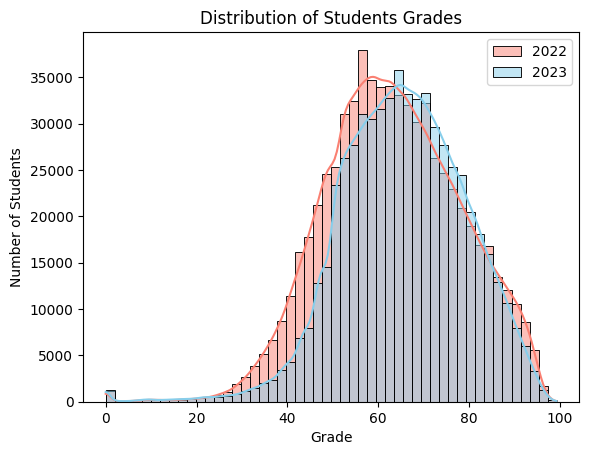

In [197]:
sns.histplot(data=grades_22_all,color="salmon", x="Percentage",kde=True, bins=50, label="2022")
sns.histplot(data=grades_23_all,color="skyblue", x="percentage",kde=True, bins=50, label="2023")

# Add labels and title
plt.xlabel("Grade")
plt.ylabel("Number of Students")
plt.title("Distribution of Students Grades")

# Add a vertical line for the mean
mean_grade = mean_grades_nationwide_2022
# plt.axvline(mean_grades_nationwide_2022, color='r', label="Mean 2022")
# plt.axvline(mean_grades_nationwide_2023, color='b', label="Mean 2023")

# Show the plot
plt.legend()
plt.show()

## GDP per Governorate

Basic GDP Stats

In [198]:
print("Mean GDP:",merged_df['Total Governorate GDP'].mean())
print("Max GDP:",merged_df['Total Governorate GDP'].max())
print("Min GDP:",merged_df['Total Governorate GDP'].min())

Mean GDP: 242009515669.62964
Max GDP: 1876650000000.0
Min GDP: 16963303560.0


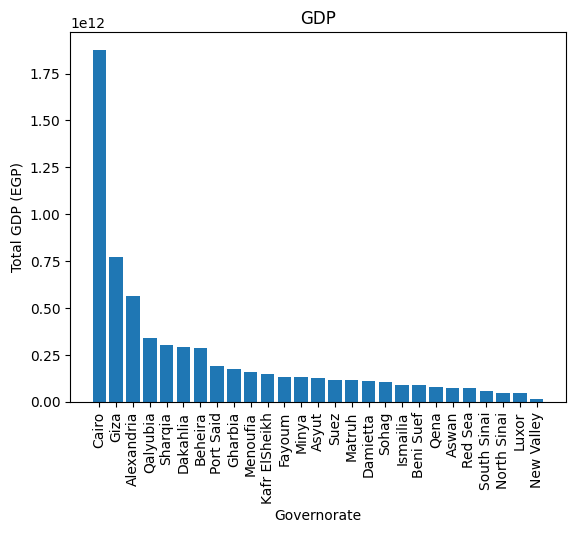

In [199]:
merged_df = merged_df.sort_values(by = "Total Governorate GDP",ascending=False)
plt.bar(merged_df['Governorate'], merged_df['Total Governorate GDP'])

# Add labels and title
plt.xlabel("Governorate")
plt.ylabel("Total GDP (EGP)")
plt.title("GDP")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

Get GDP per Capita and GDP Sector Dependency

In [200]:
economic_activities = ['Agriculture', 'Crude Petroleum Extraction', 'Other extractions', 'Petroleum Refinement',
                       'Manufacturing Industries', 'Electricity and Gas', 'Water', 'Sewerage', 'Waste Recycling',
                       'Construction', 'Whole sale and Retail Trade', 'Communication', 'Information', 'Transportation and Storage',
                       'Accommodation and Food Service Activities', 'Real Estate Ownership', 'Business Services', 'Education',
                       'Health', 'Other Services', 'Financial Corporations',
                       'General Government', 'DomesticWorkers','Total Governorate GDP']

for activity in economic_activities:
  merged_df[f"{activity} dependency"] = merged_df[activity] / merged_df['Total Governorate GDP']
  merged_df[activity] = merged_df[activity] / merged_df['Population']

print("Mean GDP per Capita:",merged_df['Total Governorate GDP'].mean())
print("Max GDP per Capita:",merged_df['Total Governorate GDP'].max())
print("Min GDP per Capita:",merged_df['Total Governorate GDP'].min())

Mean GDP per Capita: 90872.0211605594
Max GDP per Capita: 501254.9208011745
Min GDP per Capita: 18814.71995999491


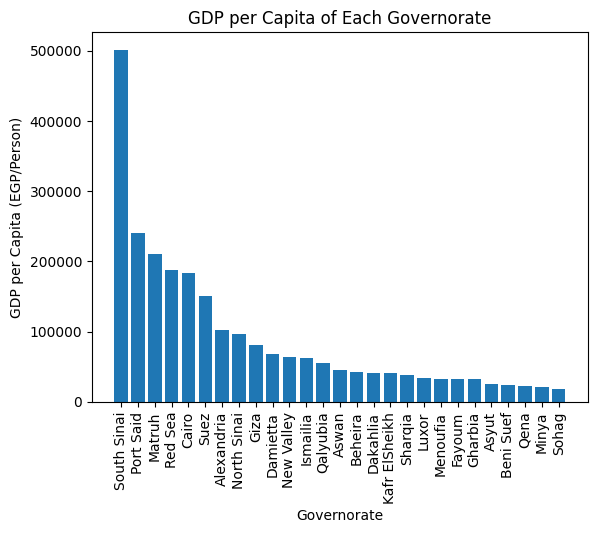

In [201]:
merged_df = merged_df.sort_values(by = "Total Governorate GDP",ascending=False)
plt.bar(merged_df['Governorate'], merged_df['Total Governorate GDP'])

# Add labels and title
plt.xlabel("Governorate")
plt.ylabel("GDP per Capita (EGP/Person)")
plt.title("GDP per Capita of Each Governorate")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

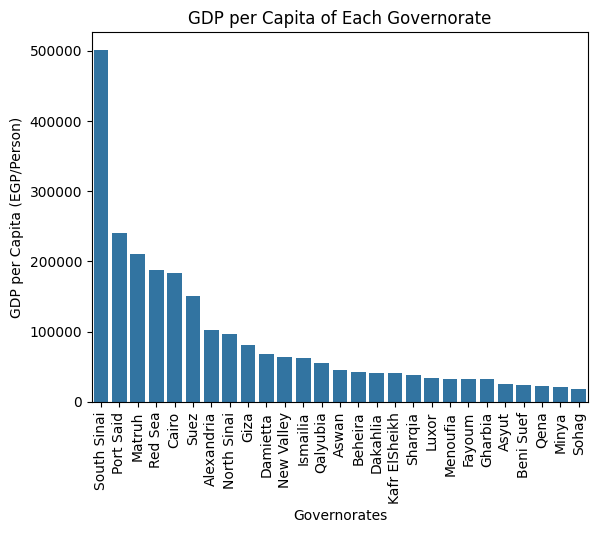

In [202]:
# Create the bar plot
sns.barplot(x=merged_df['Governorate'], y=merged_df['Total Governorate GDP'])

# Add labels and title
plt.xlabel("Governorates")
plt.ylabel("GDP per Capita (EGP/Person)")
plt.title("GDP per Capita of Each Governorate")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

Calculate the correlations and select the top N factors:


Pearson correlation coefficient between Agriculture and zscore_2022: -0.011882698366507046
Pearson correlation coefficient between Agriculture and zscore_2023: -0.09869930331997886


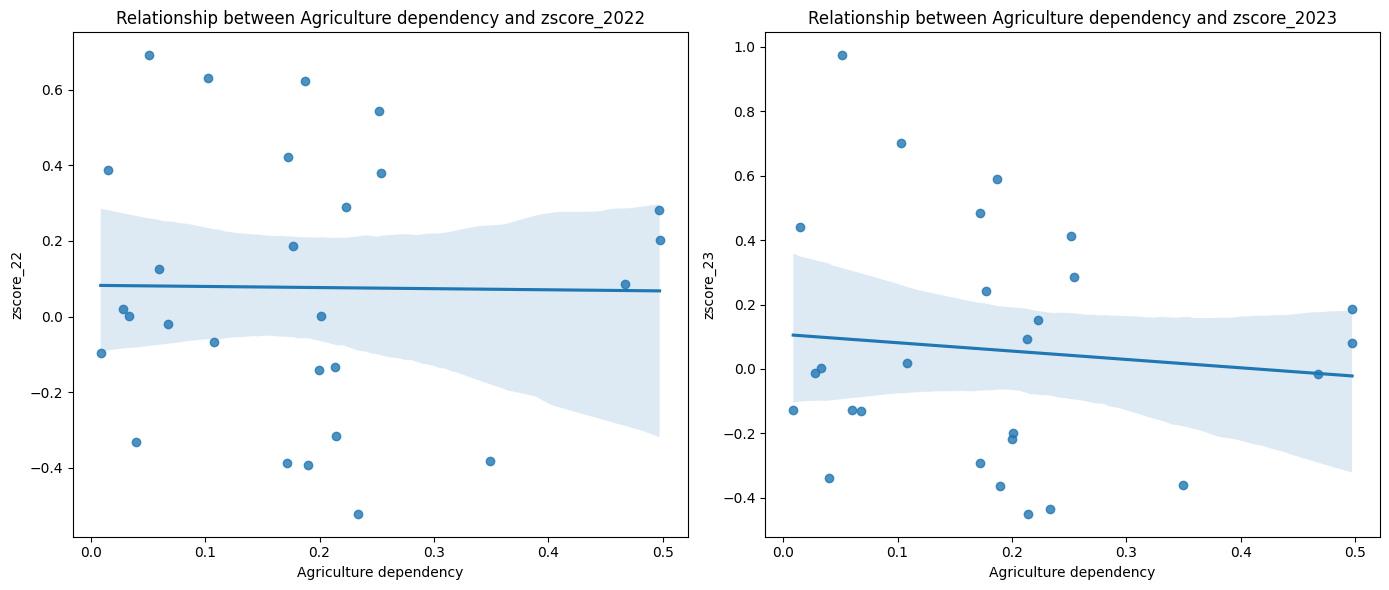

Pearson correlation coefficient between Crude Petroleum Extraction and zscore_2022: 0.4477265182263602
Pearson correlation coefficient between Crude Petroleum Extraction and zscore_2023: 0.47014414631221


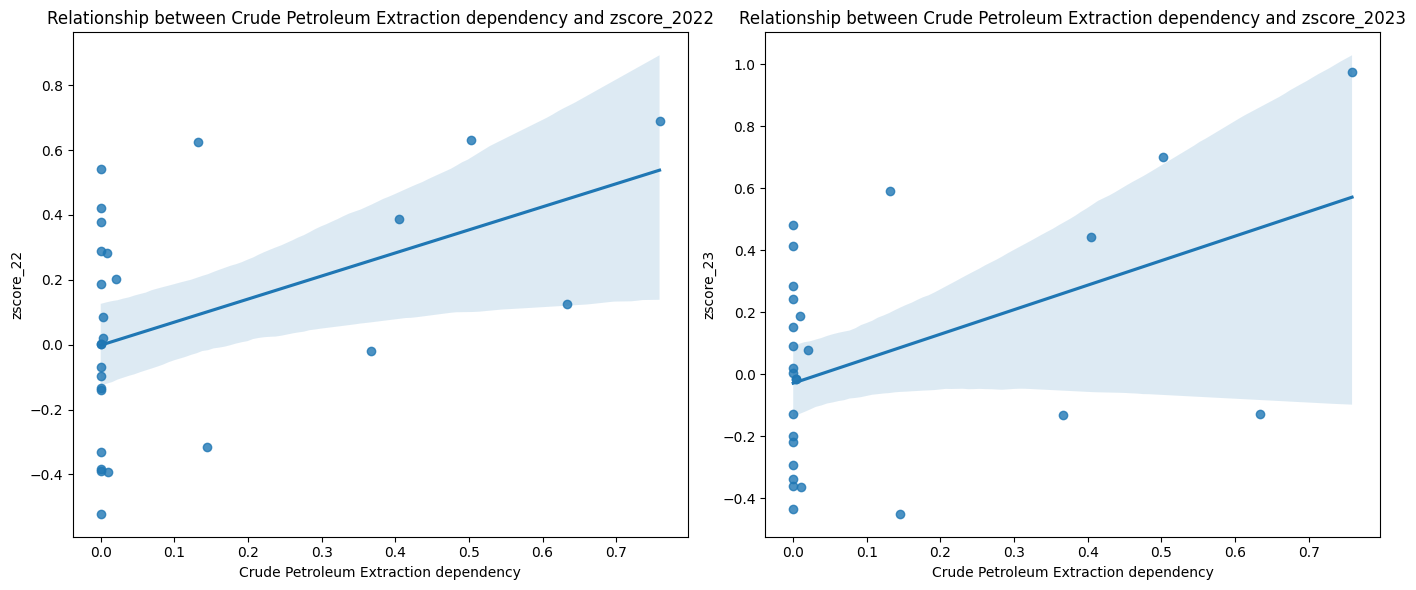

Pearson correlation coefficient between Construction and zscore_2022: -0.5221328190029816
Pearson correlation coefficient between Construction and zscore_2023: -0.5039445278324779


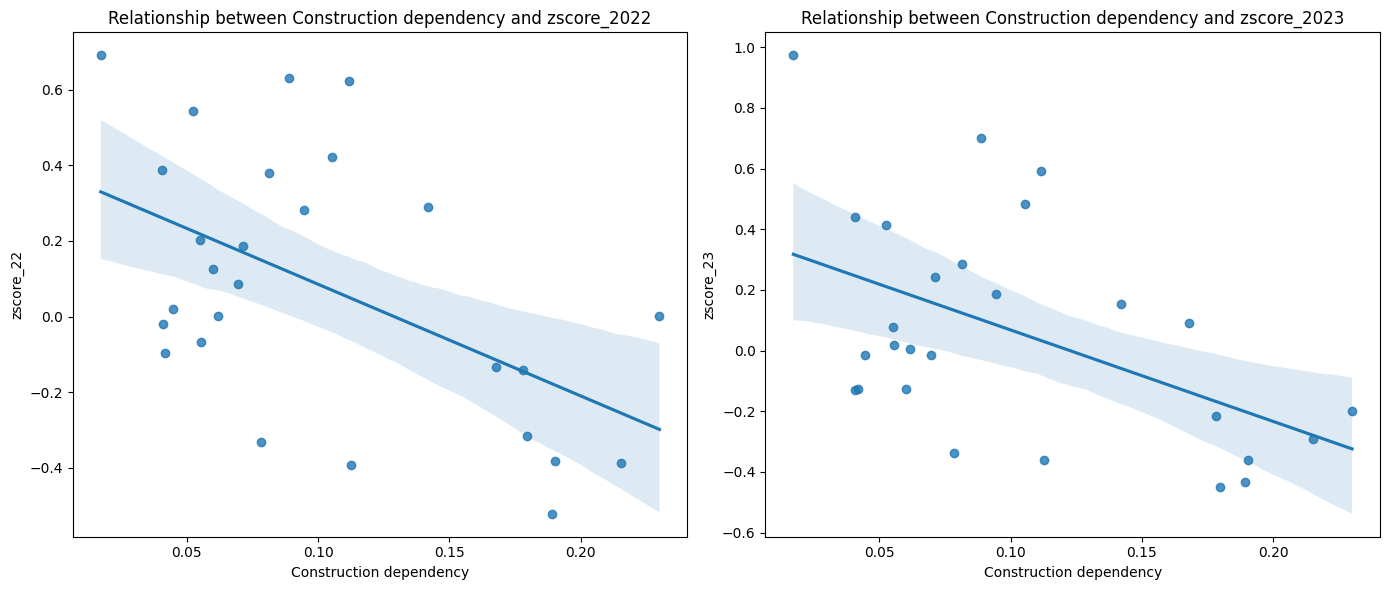

Pearson correlation coefficient between Whole sale and Retail Trade and zscore_2022: -0.33584199303245094
Pearson correlation coefficient between Whole sale and Retail Trade and zscore_2023: -0.32969053615723626


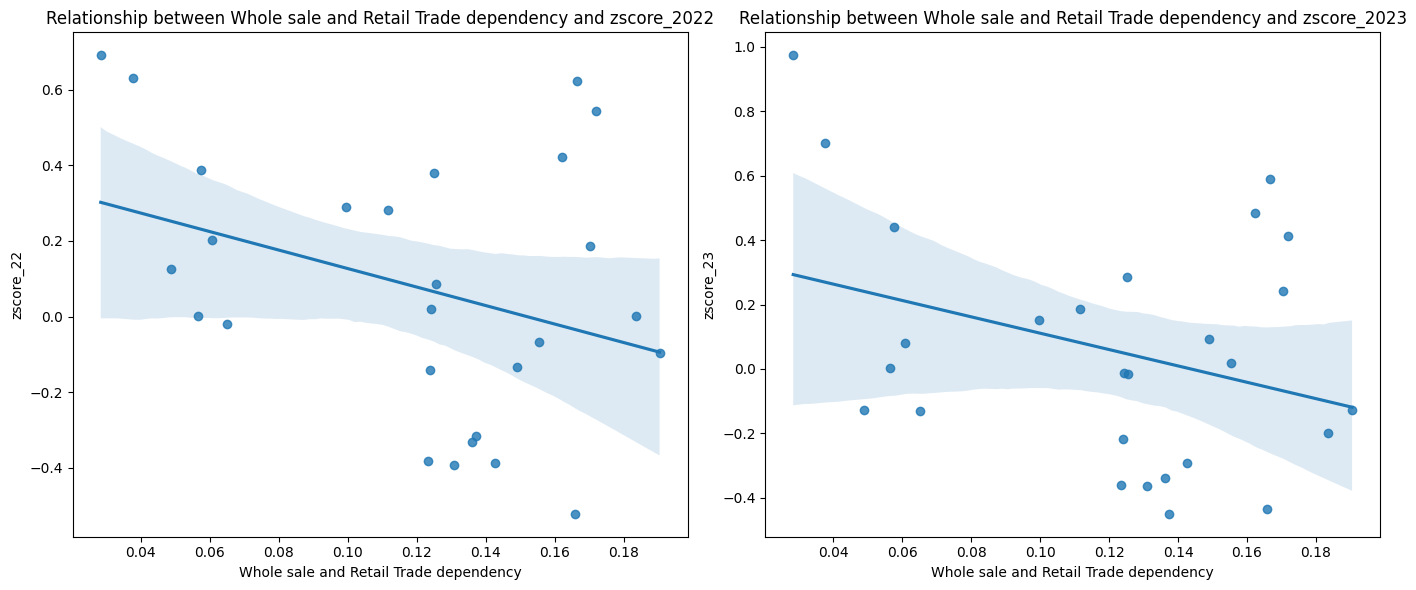

Pearson correlation coefficient between Real Estate Ownership and zscore_2022: -0.46533264058565793
Pearson correlation coefficient between Real Estate Ownership and zscore_2023: -0.4914976175395365


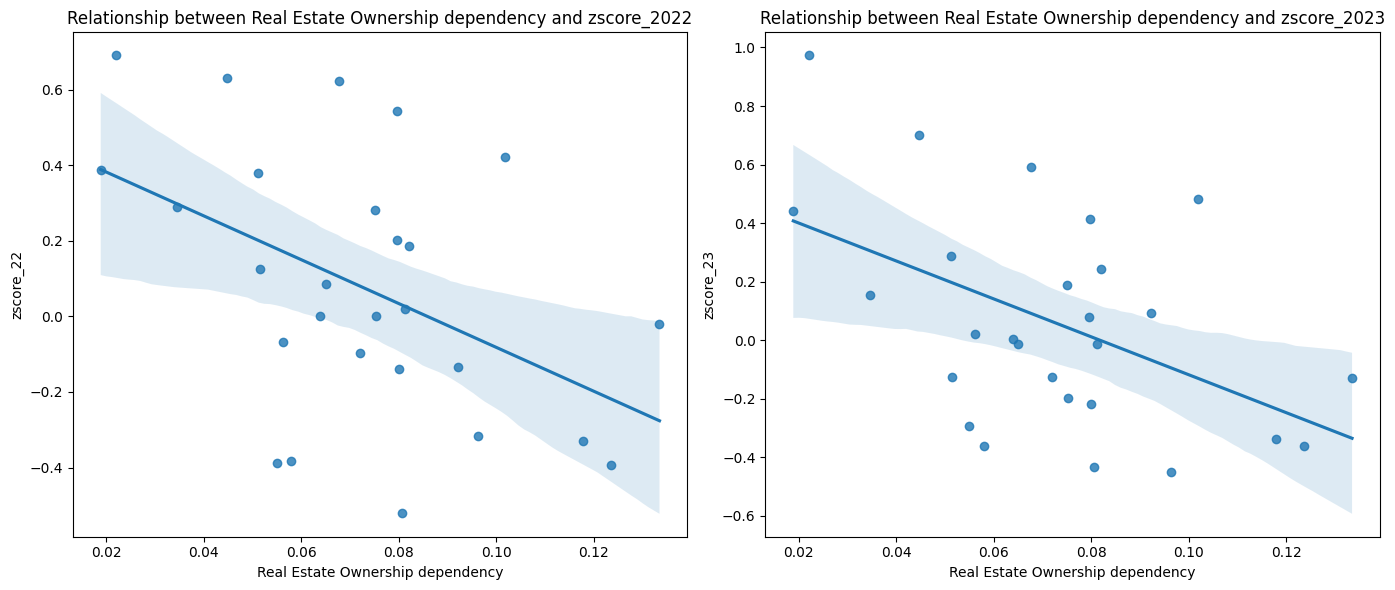

In [217]:
economic_activities = ['Agriculture', 'Crude Petroleum Extraction',
                        'Construction', 'Whole sale and Retail Trade',
                        'Real Estate Ownership',
                       ]

print()

# Plot each correlation
for factor in economic_activities:
    plt.figure(figsize=(14, 6))

    correlation = merged_df[f'{factor} dependency'].corr(merged_df['zscore_2022'])
    print(f'Pearson correlation coefficient between {factor} and zscore_2022: {correlation}')

    # Plot for zscore_22
    plt.subplot(1, 2, 1)
    sns.regplot(x=f"{factor} dependency", y='zscore_2022', data=merged_df)
    plt.title(f'Relationship between {factor} dependency and zscore_2022')
    plt.xlabel(f"{factor} dependency")
    plt.ylabel('zscore_22')

    correlation = merged_df[f'{factor} dependency'].corr(merged_df['zscore_2023'])
    print(f'Pearson correlation coefficient between {factor} and zscore_2023: {correlation}')

    # Plot for zscore_23
    plt.subplot(1, 2, 2)
    sns.regplot(x=f"{factor} dependency", y='zscore_2023', data=merged_df)
    plt.title(f'Relationship between {factor} dependency and zscore_2023')
    plt.xlabel(factor+ " dependency")
    plt.ylabel('zscore_23')

    plt.tight_layout()
    plt.show()

In [230]:

relevant_columns = [
    'Agriculture',
    'Construction',
    "Crude Petroleum Extraction",'zscore_2022','zscore_2023'
]
# Calculate the correlation matrix
corr_matrix = merged_df[relevant_columns].corr()

# Define target columns
target_columns = ['zscore_2022','zscore_2023']

# Define the number of top factors to select
top_n = 2

# Dictionary to store top factors for each target
top_factors = {}
for target in target_columns:
    # Sort correlations with other columns for the target column
    correlations = corr_matrix[target].abs().sort_values(ascending=False)
    # Select top correlated factors excluding target_columns
    top_factors[target] = [factor for factor in correlations.index if factor not in target_columns]
unique_top_factors = set(factor for factors in top_factors.values() for factor in factors)
top_factors



{'zscore_2022': ['Agriculture', 'Crude Petroleum Extraction', 'Construction'],
 'zscore_2023': ['Crude Petroleum Extraction', 'Agriculture', 'Construction']}

Plot the correlation heatmap for the selected columns




In [231]:
columns_to_include = ['zscore_2022', 'zscore_2023'] + list(unique_top_factors)
data_subset = merged_df[columns_to_include]

# Calculate the correlation matrix for the subset
corr_subset = data_subset.corr()

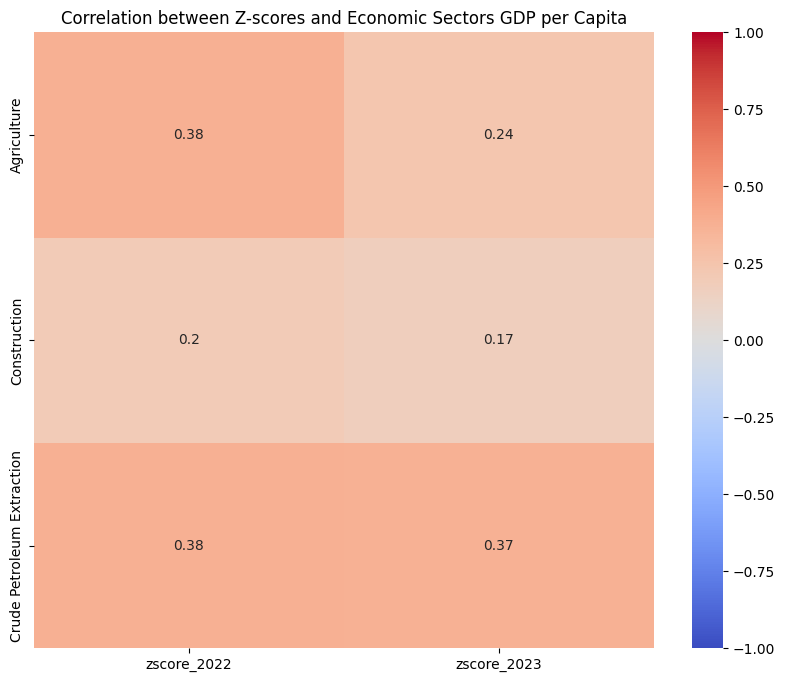

In [232]:
# Select only the correlations with zscore_22 and zscore_23
heatmap_data = corr_subset.loc[list(unique_top_factors), ['zscore_2022', 'zscore_2023']]

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Z-scores and Economic Sectors GDP per Capita')
plt.show()


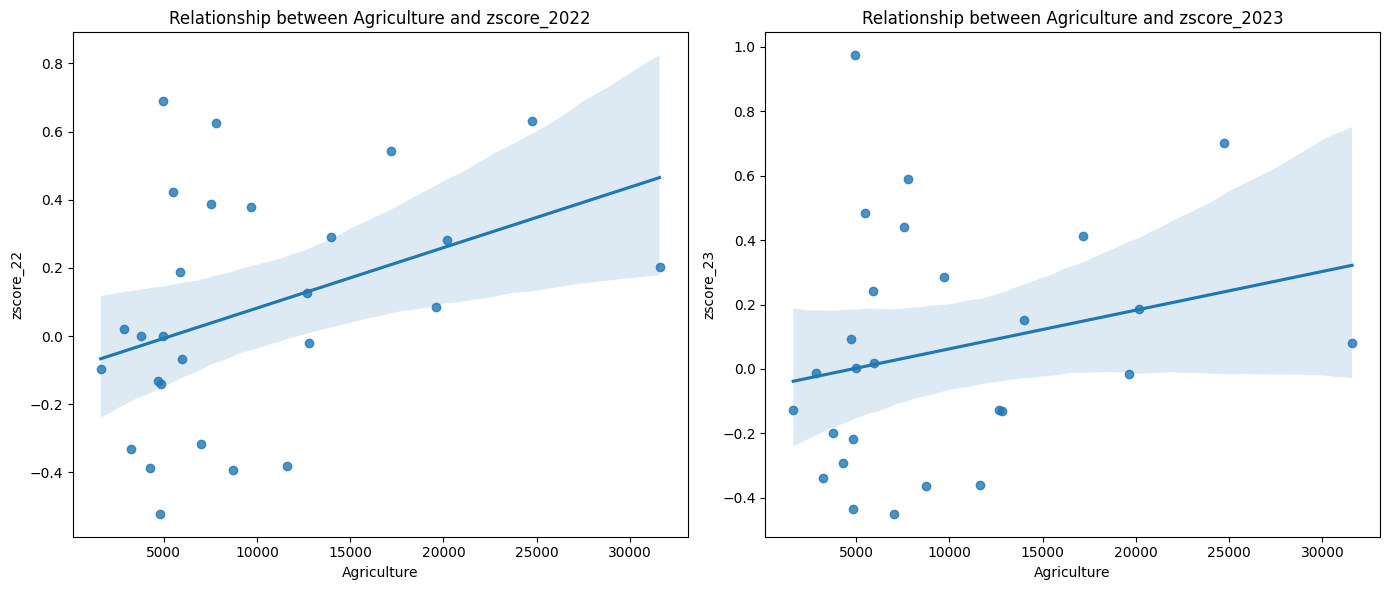

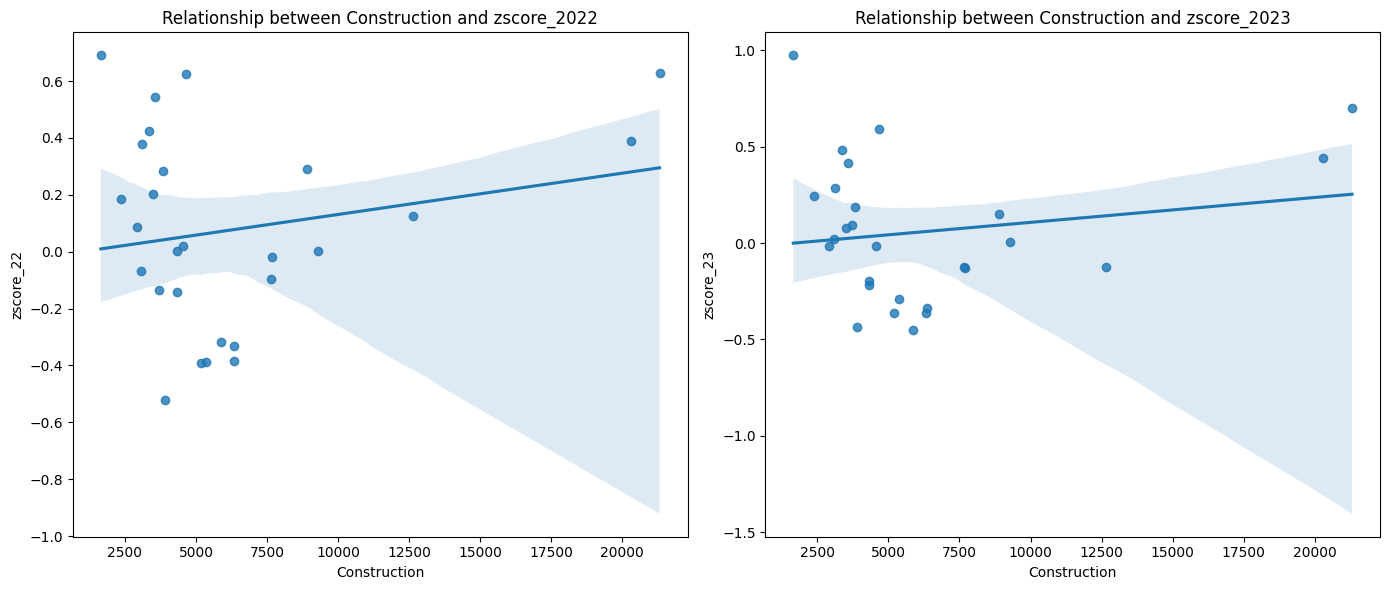

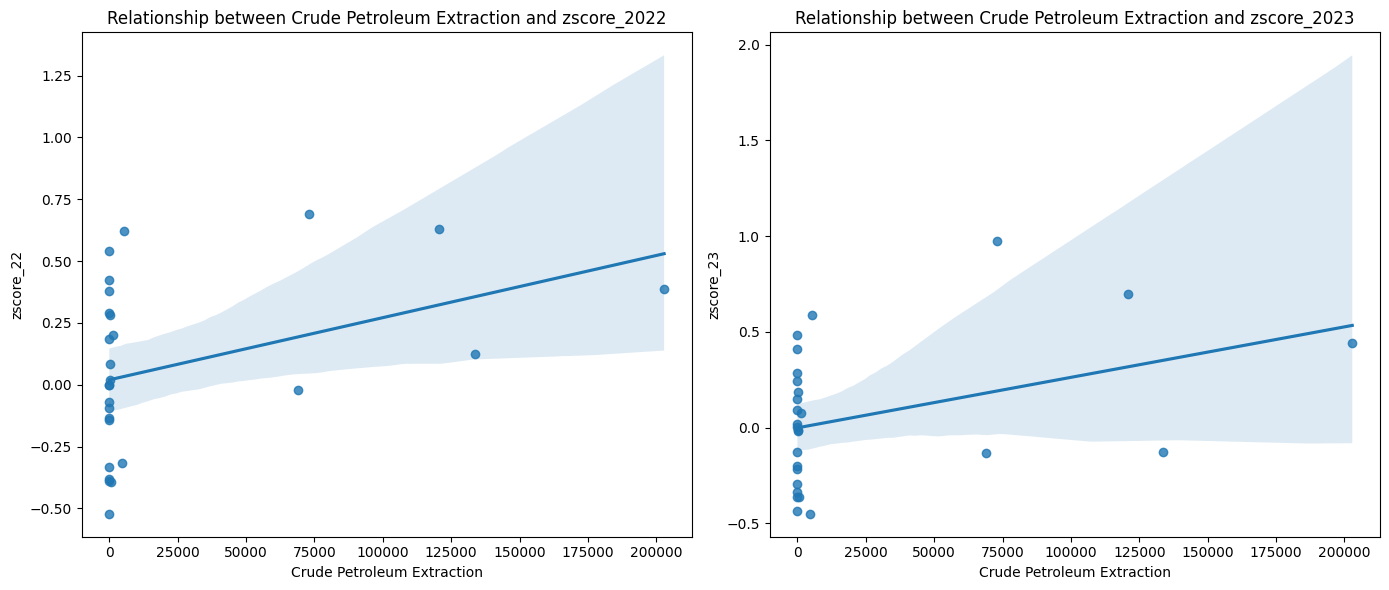

In [233]:
# # Plot each correlation
# for factor in unique_top_factors:
#     plt.figure(figsize=(14, 6))

#     # Plot for zscore_22
#     plt.subplot(1, 2, 1)
#     sns.regplot(x=factor, y='zscore_2022', data=merged_df)
#     plt.title(f'Relationship between {factor} and zscore_2022')
#     plt.xlabel(factor)
#     plt.ylabel('zscore_22')

#     # Plot for zscore_23
#     plt.subplot(1, 2, 2)
#     sns.regplot(x=factor, y='zscore_2023', data=merged_df)
#     plt.title(f'Relationship between {factor} and zscore_2023')
#     plt.xlabel(factor)
#     plt.ylabel('zscore_23')

#     plt.tight_layout()
#     plt.show()

## Education Data

In [208]:
print(education_df.columns)

Index(['Governorate', 'public_teachers_numbers_2022',
       'public_students_numbers_2022', 'public_teachers_numbers_2023',
       'public_students_numbers_2023', 'private_teachers_numbers_2022',
       'private_students_numbers_2022', 'private_teachers_numbers_2023',
       'private_students_numbers_2023'],
      dtype='object')


Teachers to Students Ratio

In [209]:
merged_df['public_student_teacher_ratio_2022'] = merged_df['public_students_numbers_2022'] / merged_df['public_teachers_numbers_2022']
merged_df['public_student_teacher_ratio_2023'] = merged_df['public_students_numbers_2023'] / merged_df['public_teachers_numbers_2023']
merged_df['private_student_teacher_ratio_2022'] = merged_df['private_students_numbers_2022'] / merged_df['private_teachers_numbers_2022']
merged_df['private_student_teacher_ratio_2023'] = merged_df['private_students_numbers_2023'] / merged_df['private_teachers_numbers_2023']

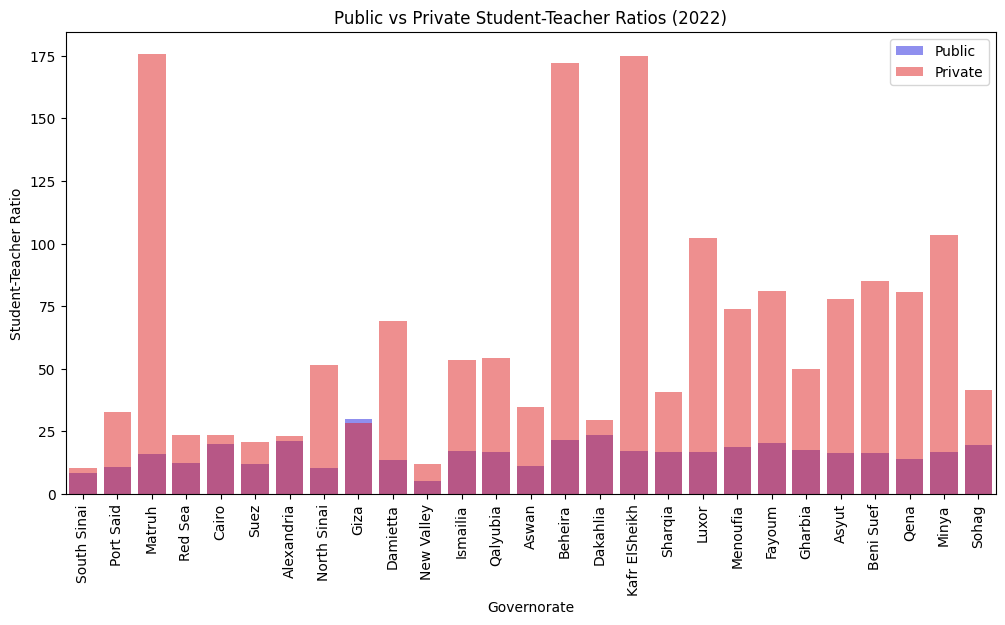

In [210]:
# Example: Public vs Private Student-Teacher Ratio 2022
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_df, x='Governorate', y='public_student_teacher_ratio_2022', color='blue', alpha=0.5, label='Public')
sns.barplot(data=merged_df, x='Governorate', y='private_student_teacher_ratio_2022', color='red', alpha=0.5, label='Private')
plt.xticks(rotation=90)
plt.title('Public vs Private Student-Teacher Ratios (2022)')
plt.xlabel('Governorate')
plt.ylabel('Student-Teacher Ratio')
plt.legend()
plt.show()


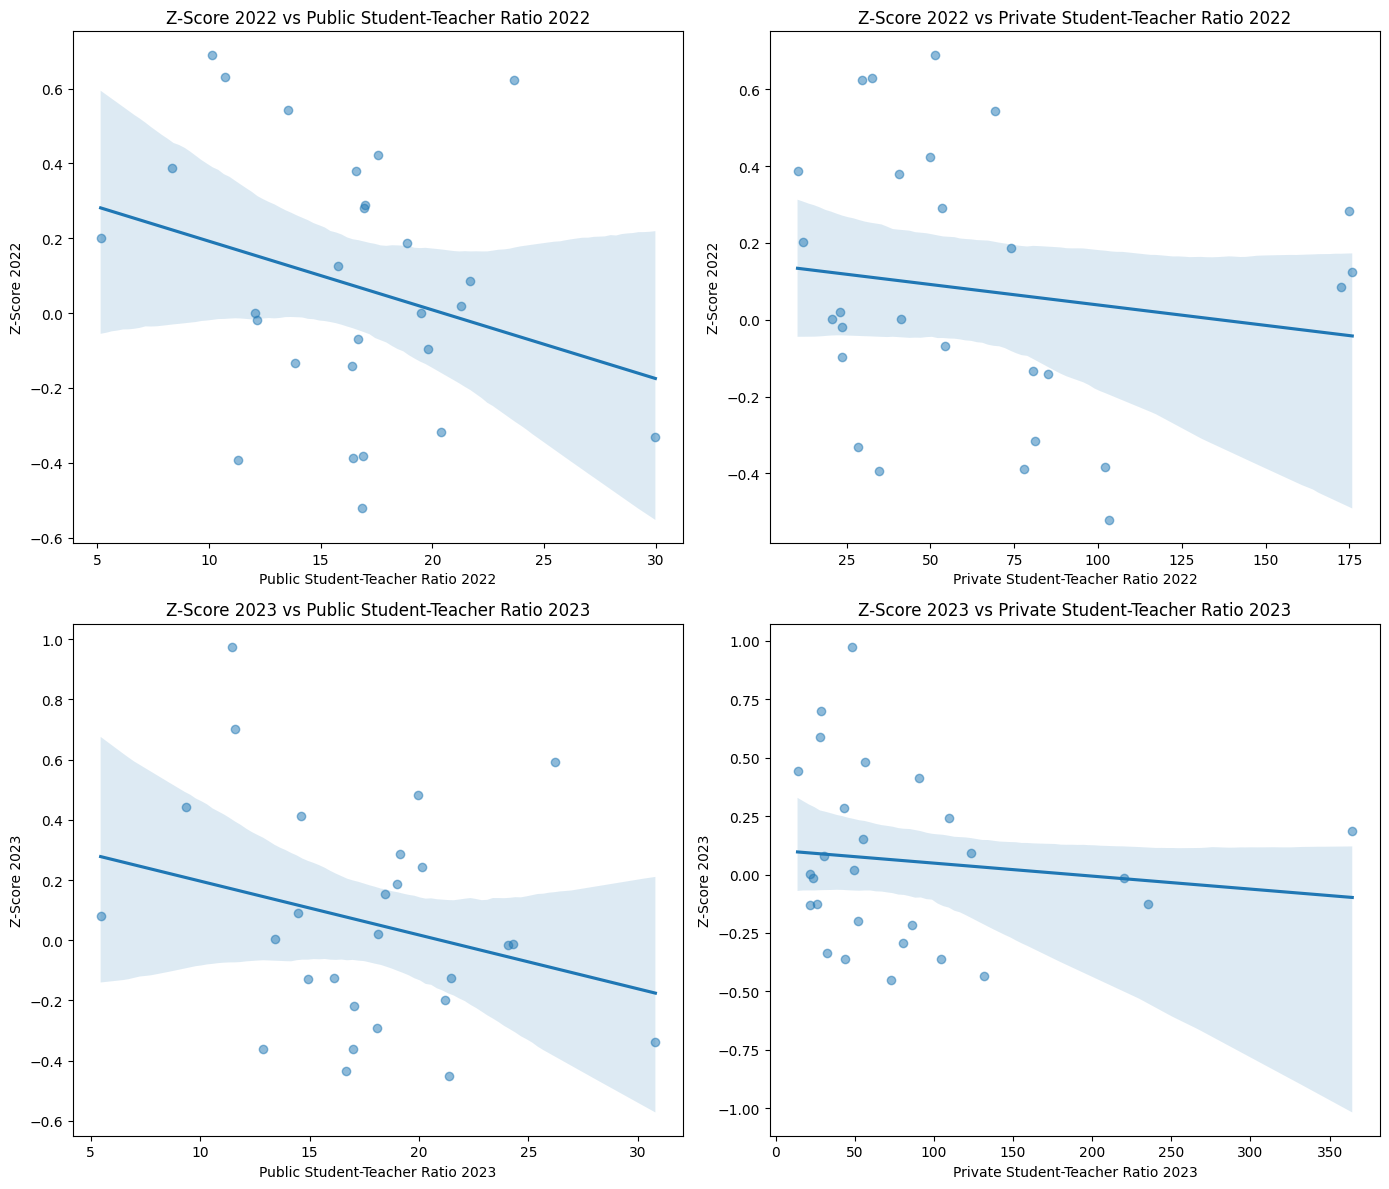

In [211]:

# Scatter plots with regression lines for 2022
plt.figure(figsize=(14, 12))

# Scatter plot for public student-teacher ratio 2022 vs zscore 2022
plt.subplot(2, 2, 1)
sns.regplot(x='public_student_teacher_ratio_2022', y='zscore_2022', data=merged_df, scatter_kws={'alpha':0.5})
plt.title('Z-Score 2022 vs Public Student-Teacher Ratio 2022')
plt.xlabel('Public Student-Teacher Ratio 2022')
plt.ylabel('Z-Score 2022')

# Scatter plot for private student-teacher ratio 2022 vs zscore 2022
plt.subplot(2, 2, 2)
sns.regplot(x='private_student_teacher_ratio_2022', y='zscore_2022', data=merged_df, scatter_kws={'alpha':0.5})
plt.title('Z-Score 2022 vs Private Student-Teacher Ratio 2022')
plt.xlabel('Private Student-Teacher Ratio 2022')
plt.ylabel('Z-Score 2022')

# Scatter plots with regression lines for 2023
# Scatter plot for public student-teacher ratio 2023 vs zscore 2023
plt.subplot(2, 2, 3)
sns.regplot(x='public_student_teacher_ratio_2023', y='zscore_2023', data=merged_df, scatter_kws={'alpha':0.5})
plt.title('Z-Score 2023 vs Public Student-Teacher Ratio 2023')
plt.xlabel('Public Student-Teacher Ratio 2023')
plt.ylabel('Z-Score 2023')

# Scatter plot for private student-teacher ratio 2023 vs zscore 2023
plt.subplot(2, 2, 4)
sns.regplot(x='private_student_teacher_ratio_2023', y='zscore_2023', data=merged_df, scatter_kws={'alpha':0.5})
plt.title('Z-Score 2023 vs Private Student-Teacher Ratio 2023')
plt.xlabel('Private Student-Teacher Ratio 2023')
plt.ylabel('Z-Score 2023')

plt.tight_layout()
plt.show()